Two-term perturbation approximation: $$e^{-t}+ \epsilon(-\dfrac{e^t}{8}+\dfrac{e^{-t}}{8}+\dfrac{t}{4}e^{-t}-\dfrac{t^2}{4}e^{-t})$$

Six-term Taylor approximation: $$1-t+\dfrac{t^2}{2}+\dfrac{ \epsilon-1}{6}t^3+\dfrac{1-2\epsilon}{24}t^4+\dfrac{4\epsilon-1}{120}t^5$$

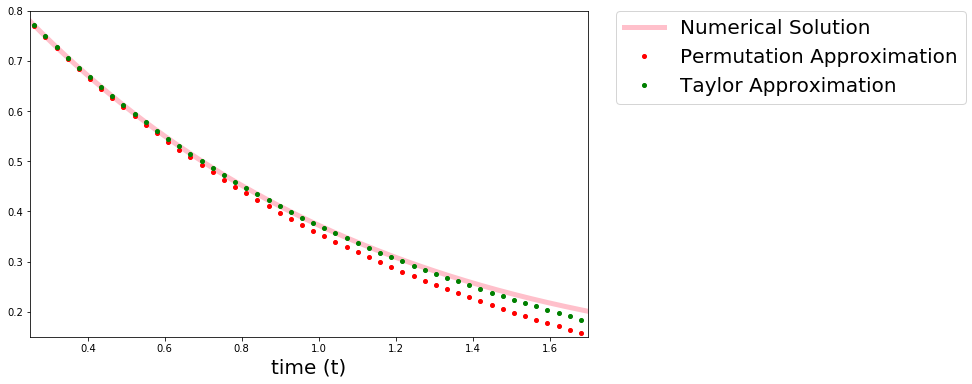

In [24]:
# copypasted from https://math.dartmouth.edu/~m46s17/notebooks/regper1.html
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

ep = 0.04
tf = 2

# numerical solution of u'' - u = e*t*u
# initial: u1 = u, u2 = u', eqn: u1' = u2, u2' = e*t*u1 + u1
def fn(u, t):
	return [u[1], ep*t*u[0] + u[0]]

plt.figure(figsize = (10, 6))
t = np.linspace(0, tf, 5000)
usolu = odeint(fn, [1, -1], t)
plt.plot(t, usolu[:, 0], color='pink', ls='-', lw=5, label='Numerical Solution')

# permutation approximation
t = np.linspace(0, tf, 70)
uperm = np.exp(-t) + ep*(-np.exp(t)/8 + np.exp(-t)/8 + (t/4)*np.exp(-t) - ((t**2)/4)*np.exp(-t))
plt.plot(t, uperm, 'r.', ms=8, label='Permutation Approximation')

# taylor approximation
t = np.linspace(0, tf, 70)
utayl = 1 - t + (t**2)/2 + ((ep-1)/6)*t**3 + ((1-2*ep)/24)*t**4 + ((4*ep-1)/120)*t**5
plt.plot(t, utayl, 'g.', ms=8, label='Taylor Approximation')

plt.xlim(0.25, 1.7)
plt.ylim(0.15, 0.8)
plt.xlabel('time (t)',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.show;

# I spent 2 hours learning & writing this in python... so much regret :P

As we can see in the graph, while the perturbation approximation works (fairly well) for small t, because of its secular terms, it deviates noticeably more than the Taylor series approximation at higher t values.

Written by: Sungil Ahn